### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 1


### Дисциплина: Методы машинного обучения

##### Студент:  Маслова Анастасия
##### Группа:   НКНбд-01-21

## Москва 2024
***

### Вариант №9

1. Набор данных: diamonds 

2. Независимая переменная: features/carat 

3. Зависимая переменная: features/y 

4. Визуализация для независимой переменной – эмпирическая плотность распределения 

5. Визуализация для зависимой переменной – столбчатая диаграмма 

6. Показатель качества регрессии – MAE (mean absolute error) 

### Решение

1. Загрузите заданный в индивидуальном задании набор данных из Tensorflow Datasets и оставьте в наборе данных признаки, принимающие непрерывные числовые значения, включая указанные в индивидуальном задании независимую и зависимую переменные. Вычислите матрицу корреляции признаков и выведите названия (номера) пар признаков с наиболее низкой и наиболее высокой корреляцией. 

In [1]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf


In [2]:
ds = tfds.load("diamonds", split='train')

In [3]:
df = tfds.as_dataframe(ds)

df.drop(columns=['features/color'],inplace=True)
df.drop(columns=['features/cut'],inplace=True)
df['carat'] = df['features/carat']
df.drop(columns=['features/carat'],inplace=True)
df.drop(columns=['features/clarity'],inplace=True)
df['depth'] = df['features/depth']
df.drop(columns=['features/depth'],inplace=True)
df['table'] = df['features/table']
df.drop(columns=['features/table'],inplace=True)
df['x'] = df['features/x']
df.drop(columns=['features/x'],inplace=True)
df['y'] = df['features/y']
df.drop(columns=['features/y'],inplace=True)
df['z'] = df['features/z']
df.drop(columns=['features/z'],inplace=True)

df.head()

,price,carat,depth,table,x,y,z
0,6546.0,1.26,60.599998,60.0,6.97,7.00,4.23
1,3030.0,0.80,62.099998,54.0,5.96,5.99,3.71
2,1915.0,0.56,61.700001,54.0,5.28,5.32,3.27
3,6936.0,1.51,64.000000,58.0,7.24,7.27,4.64
4,646.0,0.33,62.200001,54.0,4.43,4.45,2.76


In [4]:
carat = df.carat
y = df.y

In [5]:
df.corr()

,price,carat,depth,table,x,y,z
price,1.000000,0.921591,-0.010647,0.127134,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.028224,0.181618,0.975094,0.951722,0.953387
depth,-0.010647,0.028224,1.000000,-0.295779,-0.025289,-0.029341,0.094924
table,0.127134,0.181618,-0.295779,1.000000,0.195344,0.183760,0.150929
x,0.884435,0.975094,-0.025289,0.195344,1.000000,0.974701,0.970772
y,0.865421,0.951722,-0.029341,0.183760,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.094924,0.150929,0.970772,0.952006,1.000000


In [6]:
print(df.corr().min())
print(df.corr().max())

price   -0.010647
carat    0.028224
depth   -0.295779
table   -0.295779
x       -0.025289
y       -0.029341
z        0.094924
dtype: float64
price    1.0
carat    1.0
depth    1.0
table    1.0
x        1.0
y        1.0
z        1.0
dtype: float64


2. Выполните визуализацию независимой и зависимой переменных в соответствии с индивидуальным заданием, подписывая оси и рисунок (Независимая переменная: features/carat, зависимая переменная: features/y, визуализация для независимой переменной – эмпирическая плотность распределения, визуализация для зависимой переменной – столбчатая диаграмма)

<Axes: ylabel='Frequency'>

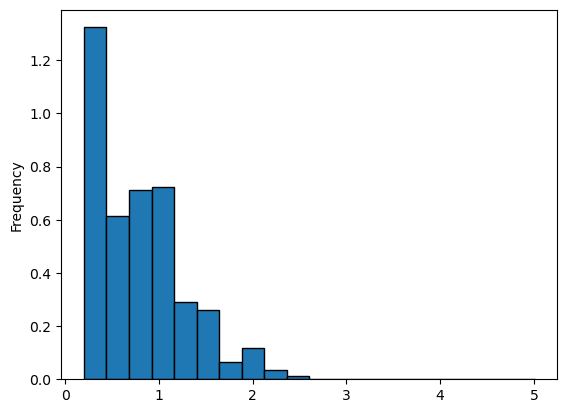

In [7]:
df['carat'].plot.hist(edgecolor='black', bins=20, density=True)

In [8]:
df.info()

<class 'tensorflow_datasets.core.as_dataframe.as_dataframe.<locals>.StyledDataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   53940 non-null  float32
 1   carat   53940 non-null  float32
 2   depth   53940 non-null  float32
 3   table   53940 non-null  float32
 4   x       53940 non-null  float32
 5   y       53940 non-null  float32
 6   z       53940 non-null  float32
dtypes: float32(7)
memory usage: 1.4 MB


<Axes: title={'center': 'Столбчатая диаграмма признака y'}>

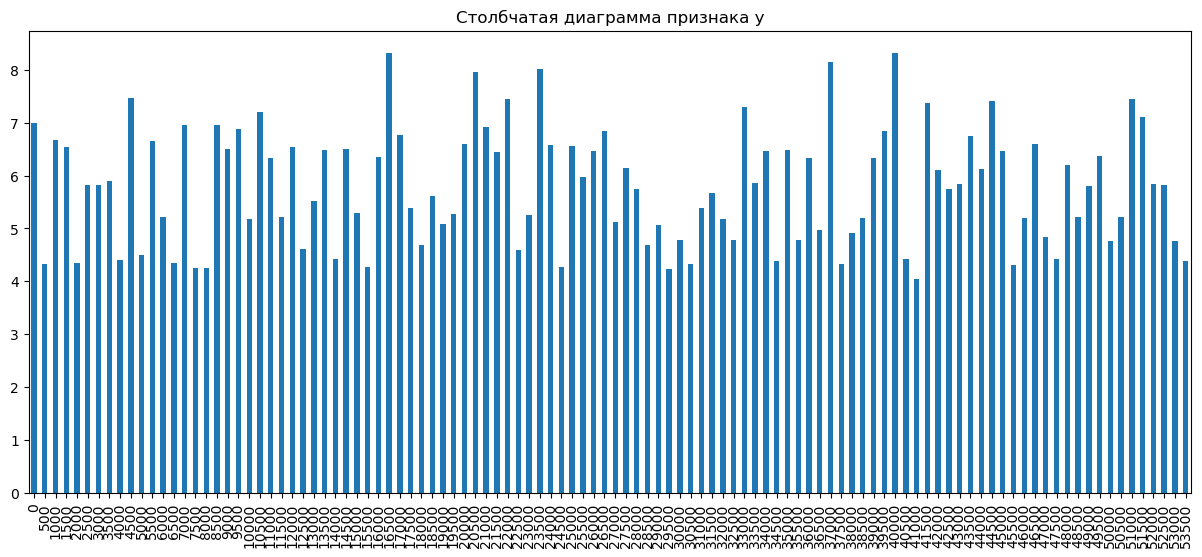

In [9]:
df[::500]['y'].plot.bar(title='Столбчатая диаграмма признака y', figsize=(15,6)) # шаг 500

3. Постройте диаграмму рассеяния для независимого и зависимого признаков, подписывая оси и рисунок, определите наличие одиноко расположенные точек и, при наличии, удалите их. 

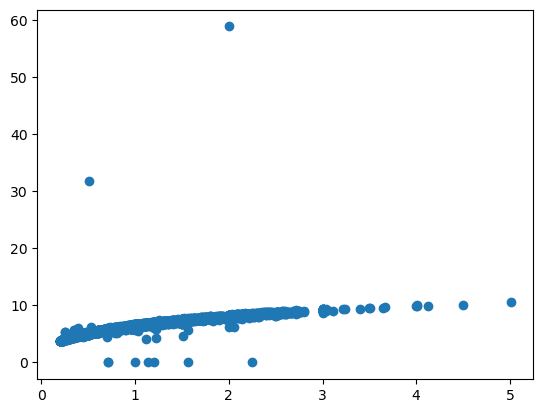

In [10]:
plt.scatter(df.carat,df.y)

In [11]:
np.max(df.y)

58.900001525878906

In [12]:
y1 = df.y[(df.y>0.0) & (df.y<30.0)]
carat1 = df.carat[(df.y>0.0) & (df.y<30.0)]
y = np.array(y1)
carat = np.array(carat1)
y.shape, carat.shape, df['y'].shape, df['carat'].shape


((53931,), (53931,), (53940,), (53940,))

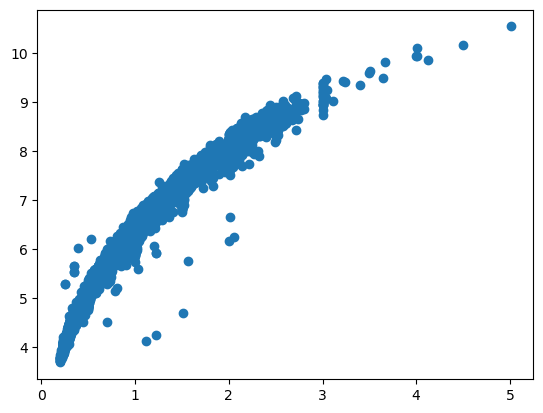

In [13]:
plt.scatter(carat,y)

4. Постройте парную линейную регрессию для независимого и зависимого признаков при помощи точного подхода и при помощи нейронной сети с одним нейроном. Определите лучший из двух подходов по показателю качества R^2 (коэффициенту детерминации). 

Точный подход:

In [14]:
class SimpleLinReg:

    def __init__(self):
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, \
            "В данных должен быть один признак"
        assert len(x_train) == len(y_train), \
            "Данные должны иметь одинаковый размер"

        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)

        self.a_ = (x_train - x_mean).dot(y_train - y_mean) / \
                  (x_train - x_mean).dot(x_train - x_mean)
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        assert x_predict.ndim == 1, \
            "В данных должен быть один признак"
        assert self.a_ is not None and self.b_ is not None, \
            "Модель вначале должна быть обучена"

        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

    def __repr__(self):
        return "SimpleLinearReg()"

In [15]:
reg = SimpleLinReg()
reg.fit(carat,y)

SimpleLinearReg()

In [16]:
reg.a_, reg.b_

(2.290804, 3.906044)

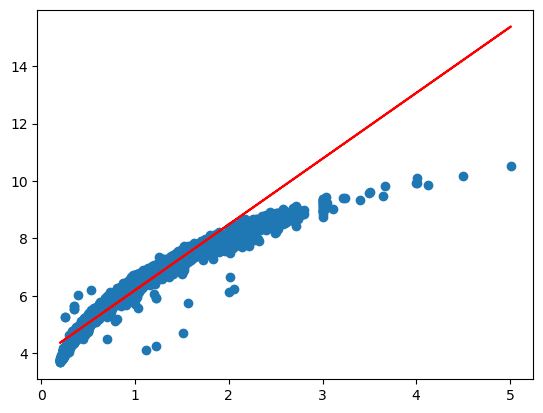

In [17]:
plt.scatter(carat, y) #blue
plt.plot(carat, reg.predict(carat), color='r')

In [18]:
y_predict = reg.predict(carat)
y_predict.shape, y.shape

((53931,), (53931,))

In [19]:
r2_score(y, y_predict)

0.9542243085688433

Нейронная сеть с одним нейроном:

In [20]:
import tensorflow as tf
print(tf.__version__)

2.17.0-dev20240418


In [21]:
model = tf.keras.Sequential( [ tf.keras.layers.Dense(1, input_shape=(1,)) ] )

C:\Users\anast\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(
    loss=tf.keras.losses.mean_absolute_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.25),
    metrics=['mean_absolute_error']
)

In [24]:
model.fit(carat, y, epochs=100)

Epoch 1/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3199 - mean_absolute_error: 0.3199
Epoch 2/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1915 - mean_absolute_error: 0.1915
Epoch 3/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1938 - mean_absolute_error: 0.1938
Epoch 4/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1890 - mean_absolute_error: 0.1890
Epoch 5/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1915 - mean_absolute_error: 0.1915
Epoch 6/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1891 - mean_absolute_error: 0.1891
Epoch 7/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1897 - mean_absolute_error: 0.1897
Epoch 8/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1897 - mean_absolute_error: 0.1897
Epoch 9/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1900 - mean_absolute_error: 0.1900
Epoch 10/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1881 - mean_absolute_error: 0.1881

1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1913 - mean_absolute_error: 0.1913
Epoch 62/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.1896 - mean_absolute_error: 0.1896
Epoch 63/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1867 - mean_absolute_error: 0.1867
Epoch 64/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1879 - mean_absolute_error: 0.1879
Epoch 65/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1889 - mean_absolute_error: 0.1889
Epoch 66/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1876 - mean_absolute_error: 0.1876
Epoch 67/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1920 - mean_absolute_error: 0.1920
Epoch 68/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1885 - mean_absolute_error: 0.1885
Epoch 69/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1896 - mean_absolute_error: 0.1896
Epoch 70/100
1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1904 - mean_absolute_error: 0.1904
Epo

In [25]:
y_predict2 = model.predict(carat)
y_predict2

1686/1686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


array([[6.880809 ],
       [5.7722735],
       [5.1939077],
       ...,
       [4.567344 ],
       [4.7119355],
       [5.5312877]], dtype=float32)

In [26]:
r2_score(y, y_predict), r2_score(y, y_predict2)

(0.9542243085688433, 0.9507474875450327)

5. Постройте диаграмму рассеяния для независимого и зависимого признаков и изобразите линии двух построенных парных регрессий, подписывая оси и рисунок и создавая легенду для линий регрессии.  

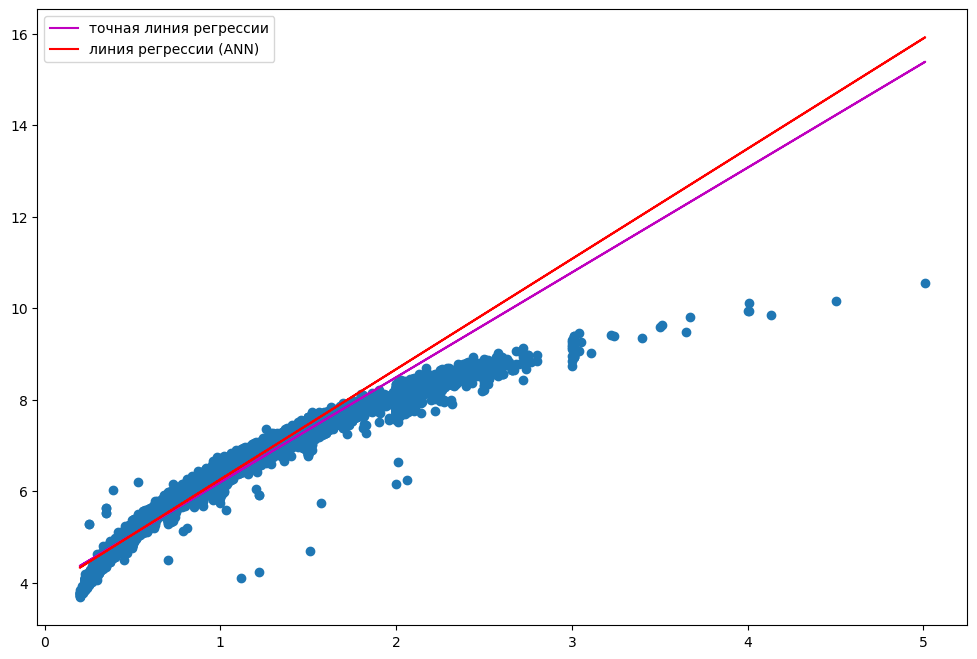

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(carat, y)
plt.plot(carat, y_predict, c='m', label='точная линия регрессии')
plt.plot(carat, y_predict2, c='r', label='линия регрессии (ANN)')
plt.legend()

6. Разбейте набор признаков на обучающую и контрольную выборки. Создайте и адаптируйте нормализующий слой Tensorflow для всех признаков набора данных (за исключением зависимого признака). Нормализуйте зависимый признак. 

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(carat, y, test_size=0.2)

In [30]:
normalizer = tf.keras.layers.Normalization()

In [31]:
normalizer.adapt(df[['carat','y']])

UnboundLocalError: cannot access local variable 'input_shape' where it is not associated with a value

In [32]:
carat_np = np.array(carat)
y_np = np.array(y)
y.shape, carat.shape
data = np.array([df.carat],[df.y])


TypeError: Field elements must be 2- or 3-tuples, got '0        7.00
1        5.99
2        5.32
3        7.27
4        4.45
         ... 
53935    6.41
53936    6.23
53937    4.32
53938    4.57
53939    5.77
Name: y, Length: 53940, dtype: float32'

In [33]:
normalizer.adapt(data)

NameError: name 'data' is not defined

In [34]:
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

AttributeError: 'Normalization' object has no attribute 'mean'

In [35]:
df[['carat','y']][0:5]

,carat,y
0,1.26,7.00
1,0.80,5.99
2,0.56,5.32
3,1.51,7.27
4,0.33,4.45


In [36]:
normalizer(df[['carat','y']]).numpy()

array([[1.26, 7.  ],
       [0.8 , 5.99],
       [0.56, 5.32],
       ...,
       [0.3 , 4.32],
       [0.36, 4.57],
       [0.7 , 5.77]], dtype=float32)

К сожалению, во время выполнения произошлои непредвиденные проблемы - я не смогла сделать нормализацию, из-за этого не смогла сделать все последующие пункты задания. Проблема возникла в строке:
```python
normalizer.adapt(df[['carat','y']])
```
Аналогичный код из Jupyter Notebook, данный на занятии, у меня также не работает. Причину или решение проблемы я так и не смогла найти.